# Plots for capital costs slideshow
Some of these should be similar to fringe benefits plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
from sodapy import Socrata
app_token = "2Qa1WiG8G4kj1vGVd2noK7zP0"
client = Socrata("cthru.data.socrata.com", app_token)
client.timeout = 40

First question: how much of DCP goes to our agencies?

In [4]:
carceral_appropriations = {"trial_court": ["(11025600) COURT FACILITIES CAPITAL NEEDS",
                                           "(03302223) COURT FACILITY IMPROVEMENTS",
                                           "(11025700) COURT FACILITIES 2018",
                                           "(03302204) COURT FACILITIES CAPITAL NEEDS & F&E"],

                           "DOC": ["(89008500) JAIL AND CORRECTIONAL FACILITIES",
                                   "(11020004) COUNTY CORRECTION FACILITIES IMPROVEMNTS",
                                   "(89100023) CORRECTION FACILITY IMPROVEMENTS",
                                   "(11027967) COUNTY CORREC FACILITIES CONSTRUC/EXPAN-"],

                           "State_Police": ["(81001001) DEPARTMENT OF STATE POLICE"],
                           }


In [5]:
def clean_DCP(DCP):
    DCP["amount"] = DCP["amount"].astype(float)
    DCP["budget_fiscal_year"] = DCP["budget_fiscal_year"].astype(int)
    return DCP


In [7]:
DCP = pd.DataFrame(client.get("pegc-naaa", where="Department = 'CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVISION (DCP)'"
                                          " AND budget_fiscal_year >= 2016 and budget_fiscal_year <= 2019",
                 limit =999999))

In [54]:
DCP = clean_DCP(DCP)
DCP_by_year = pd.DataFrame(columns=list(range(2016, 2020)))
for key in carceral_appropriations:
    DCP_by_year.loc[key] = DCP[DCP["appropriation_name"].isin(carceral_appropriations[key])]\
        .groupby("budget_fiscal_year").sum()["amount"]
DCP_by_year.fillna(0, inplace=True)

,base_id,budget_fiscal_year,fiscal_period,date,cabinet_secretariat,department,appropriation_type,appropriation_name,object_class,object_code,...,appropriation_code,object,department_code,vendor,vendor_id,payment_id,payment_method,state,city,create_date
0,A0000000002060103826,2019,5,2018-12-04T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,"(N16) MAJOR CONSTR, RENOVATION, BLDING ALTERAT...",...,11022009,N16,DCP,COLANTONIO INC,UNASSIGNED,INTFINV0000000096485,EFT,MA,HOLLISTON,2020-11-07T13:19:37.000
1,A0000000002060103827,2019,11,2019-05-10T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,"(N16) MAJOR CONSTR, RENOVATION, BLDING ALTERAT...",...,11022009,N16,DCP,COLANTONIO INC,UNASSIGNED,INTFINV0000000097991,EFT,MA,HOLLISTON,2020-11-07T13:19:37.000
2,A0000000002060104400,2019,6,2018-12-20T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,(N50) NON-MAJOR FACILITY INFRASTRUCTURE MAINTE...,...,11022009,N50,DCP,ELECTRICAL DYNAMICS INC,UNASSIGNED,12181800000000055526,EFT,MA,NORTH READING,2020-11-07T13:19:37.000
3,A0000000002060104905,2019,9,2019-03-08T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(1IN) INTRAGOVERNMENTAL/NON-SUBSIDIARIZED,(11023226) CHARGEBACK FOR STATE BUILDINGS OPER...,(NN) INFRASTRUCTURE:,(N50) NON-MAJOR FACILITY INFRASTRUCTURE MAINTE...,...,11023226,N50,DCP,ELECTRICAL DYNAMICS INC,UNASSIGNED,02261900000000077770,EFT,MA,NORTH READING,2020-11-07T13:19:37.000
4,A0000000002060104925,2019,13,2019-08-08T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022017) GENERAL FACILITIES 2018,(NN) INFRASTRUCTURE:,"(N16) MAJOR CONSTR, RENOVATION, BLDING ALTERAT...",...,11022017,N16,DCP,ENTERPRISE EQUIPMENT CO INC,UNASSIGNED,INTFINV0000000098774,EFT,MA,WEYMOUTH,2020-11-07T13:19:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66046,B0000000000458937571,2019,1,2018-07-30T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(3TN) TRUSTS,(67100100) MASSACHUSETTS DEPARTMENT OF TRANSPO...,(AA) REGULAR EMPLOYEE COMPENSATION,(A01) SALARIES: INCLUSIVE,...,67100100,A01,DCP,DCP - SUMMARY PAYROLL,UNASSIGNED,07241800000000000281,UNASSIGNED,UNASSIGNED,UNASSIGNED,2020-11-07T13:19:37.000
66047,B0000000000458937572,2019,2,2018-08-21T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(AA) REGULAR EMPLOYEE COMPENSATION,(A01) SALARIES: INCLUSIVE,...,11022009,A01,DCP,DCP - SUMMARY PAYROLL,UNASSIGNED,EMPL 020180818118751,UNASSIGNED,UNASSIGNED,UNASSIGNED,2020-11-07T13:19:37.000
66048,B0000000000458937573,2019,11,2019-05-15T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022008) STATE FACILITY IMPROVEMENTS,(AA) REGULAR EMPLOYEE COMPENSATION,(A01) SALARIES: INCLUSIVE,...,11022008,A01,DCP,DCP - SUMMARY PAYROLL,UNASSIGNED,05151900000000019667,UNASSIGNED,UNASSIGNED,UNASSIGNED,2020-11-07T13:19:37.000
66049,B0000000000458947050,2019,1,2018-07-10T00:00:00.000,EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE,CAPITAL ASSET MANAGEMENT AND MAINTENANCE DIVIS...,(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(AA) REGULAR EMPLOYEE COMPENSATION,(A01) SALARIES: INCLUSIVE,...,11022009,A01,DCP,DCP - SUMMARY PAYROLL,UNASSIGNED,EMPL 020180707114801,UNASSIGNED,UNASSIGNED,UNASSIGNED,2020-11-07T13:19:37.000


In [10]:
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 18), "lines.linewidth": 5})
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

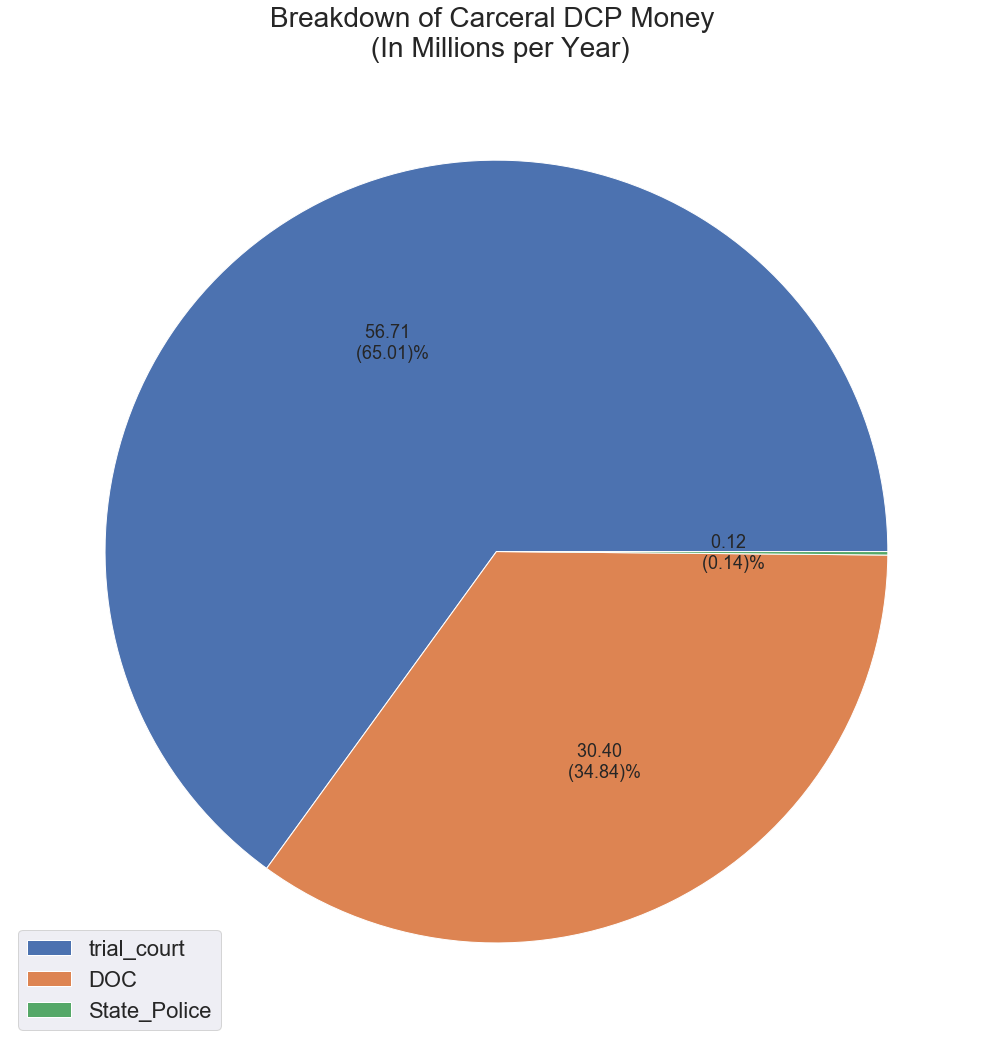

In [62]:
DCP_pie_data = DCP_by_year.sum(axis=1)/10**6/4
fig1, ax1 = plt.subplots()
ax1.pie(DCP_pie_data.values, autopct =lambda p: '{:.2f} \n ({:1.2f})%'.format(p * DCP_pie_data.sum() / 100, p),  
        textprops={'fontsize': 18} )
ax1.legend(DCP_pie_data.index, prop={'size': 22})
plt.title("Breakdown of Carceral DCP Money \n (In Millions per Year)", fontsize = 28)
fig1.savefig("Nov9_Figures/DCP_pie.png")

In [12]:
# pd.DataFrame().from_dict(carceral_appropriations, orient="index").to_csv("DCP_expenditure_labels.csv")
    

Look at non-hidden capital costs

In [24]:
import sys
import os
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory")
from Initialize_Agencies_3Ver import get_agencies

In [25]:
from Agency_Classes_2Ver import StateAgency

In [26]:
yr = list(range(2016,2020))
agencies = get_agencies(yr)

/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:162: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:162: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()


In [39]:

object_codes

['(AA) REGULAR EMPLOYEE COMPENSATION',
 '(KK) EQUIPMENT PURCHASE',
 '(HH) CONSULTANT SVCS (TO DEPTS)',
 '(UU) IT NON-PAYROLL EXPENSES',
 '(NN) INFRASTRUCTURE:',
 '(JJ) OPERATIONAL SERVICES',
 '(GG) ENERGY COSTS AND SPACE RENTAL']

In [28]:
pal = {object_codes[x]:set1[x] for x in range(len(object_codes)) }

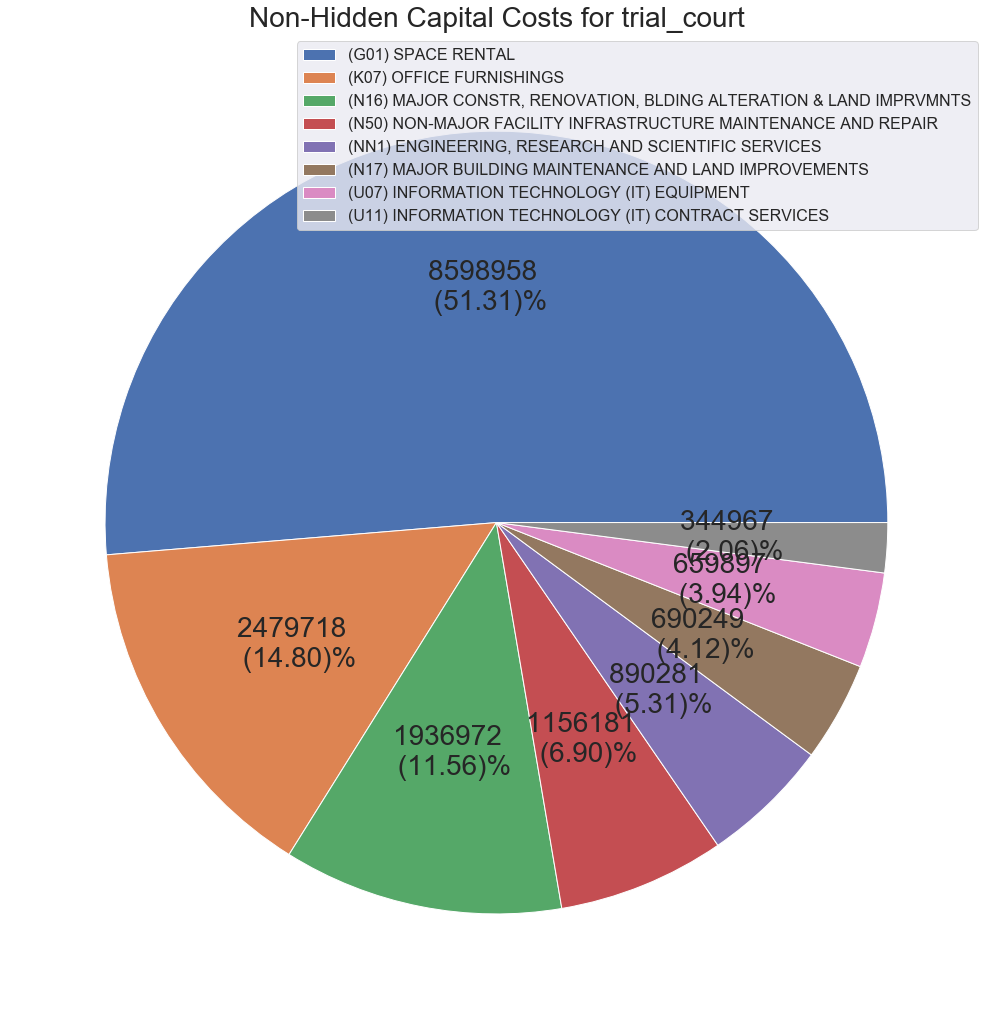

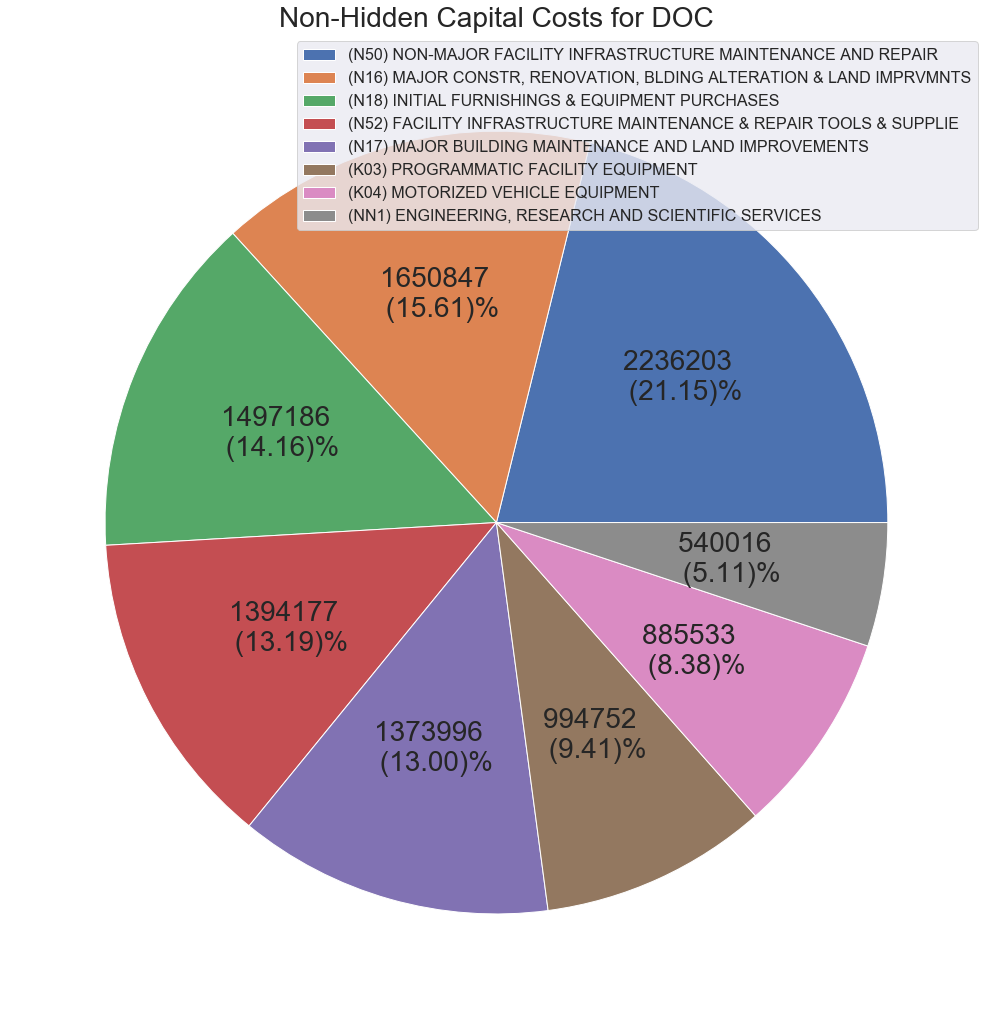

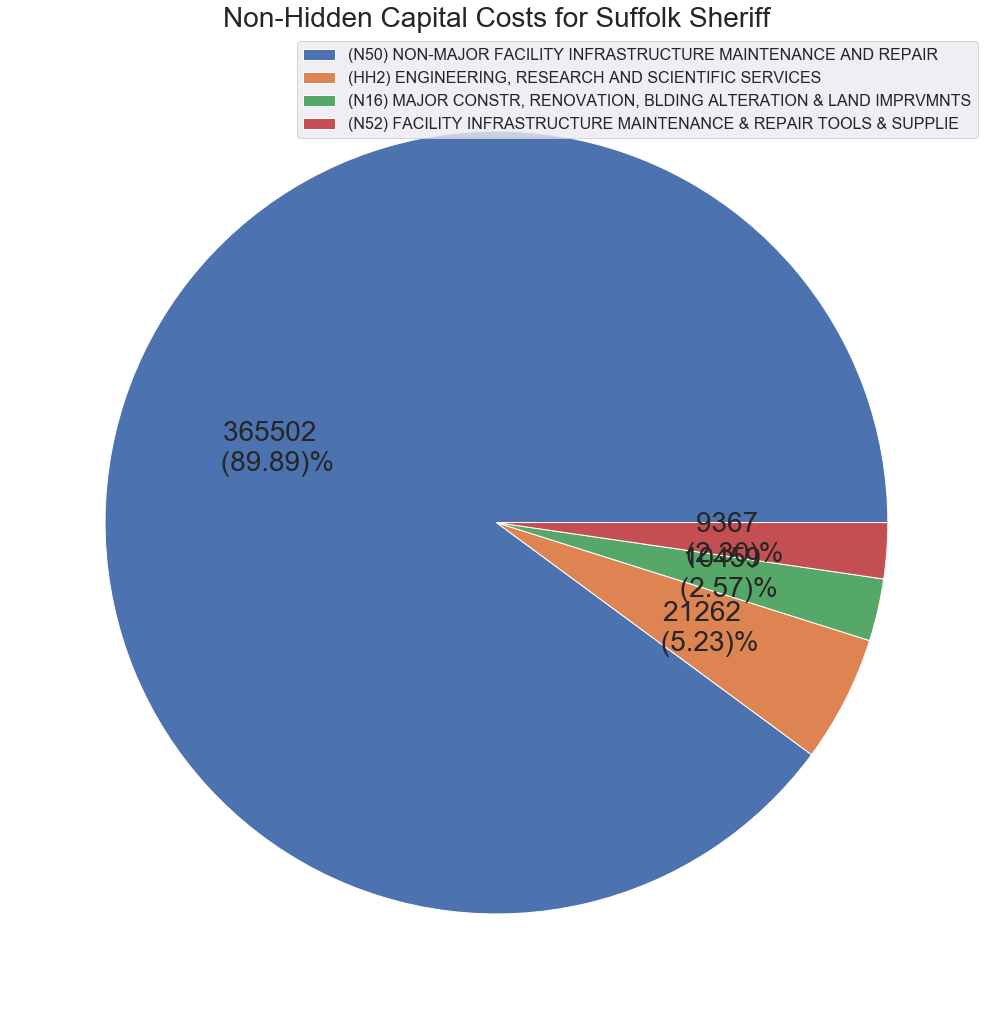

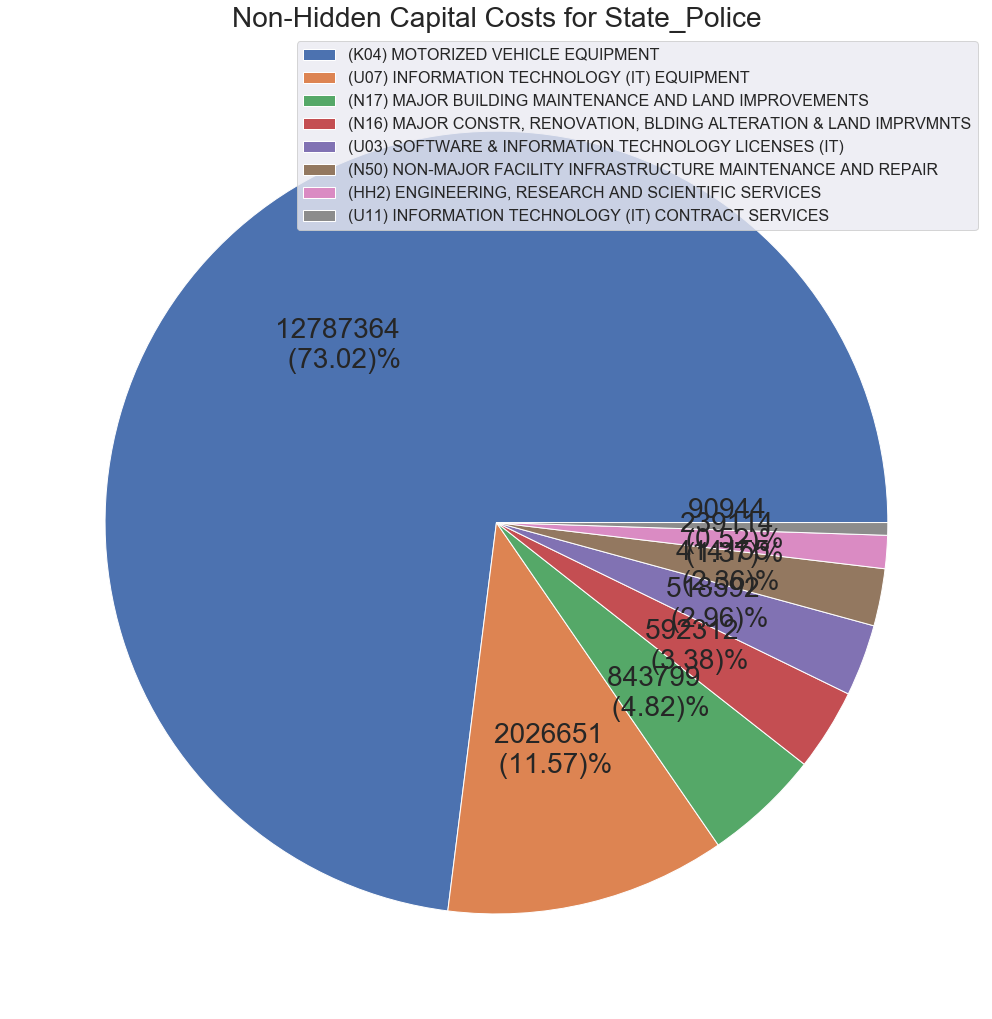

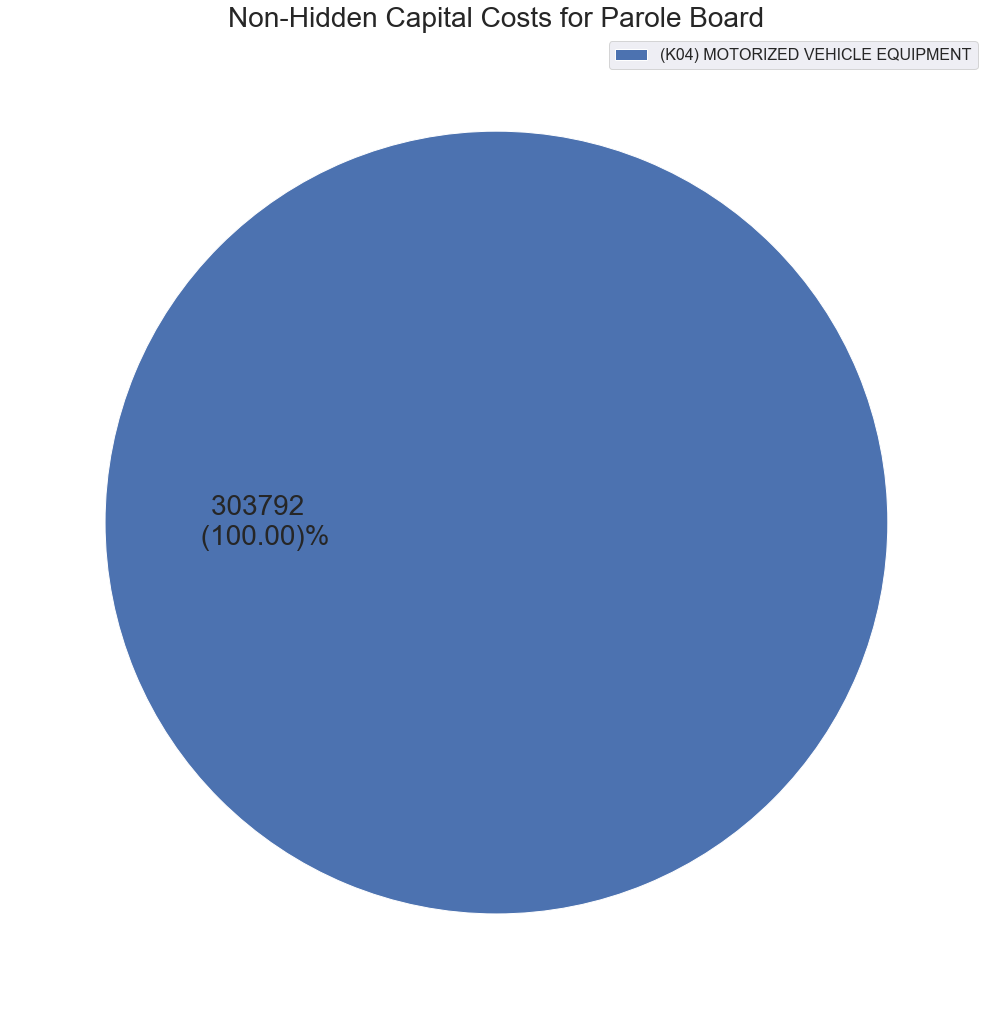

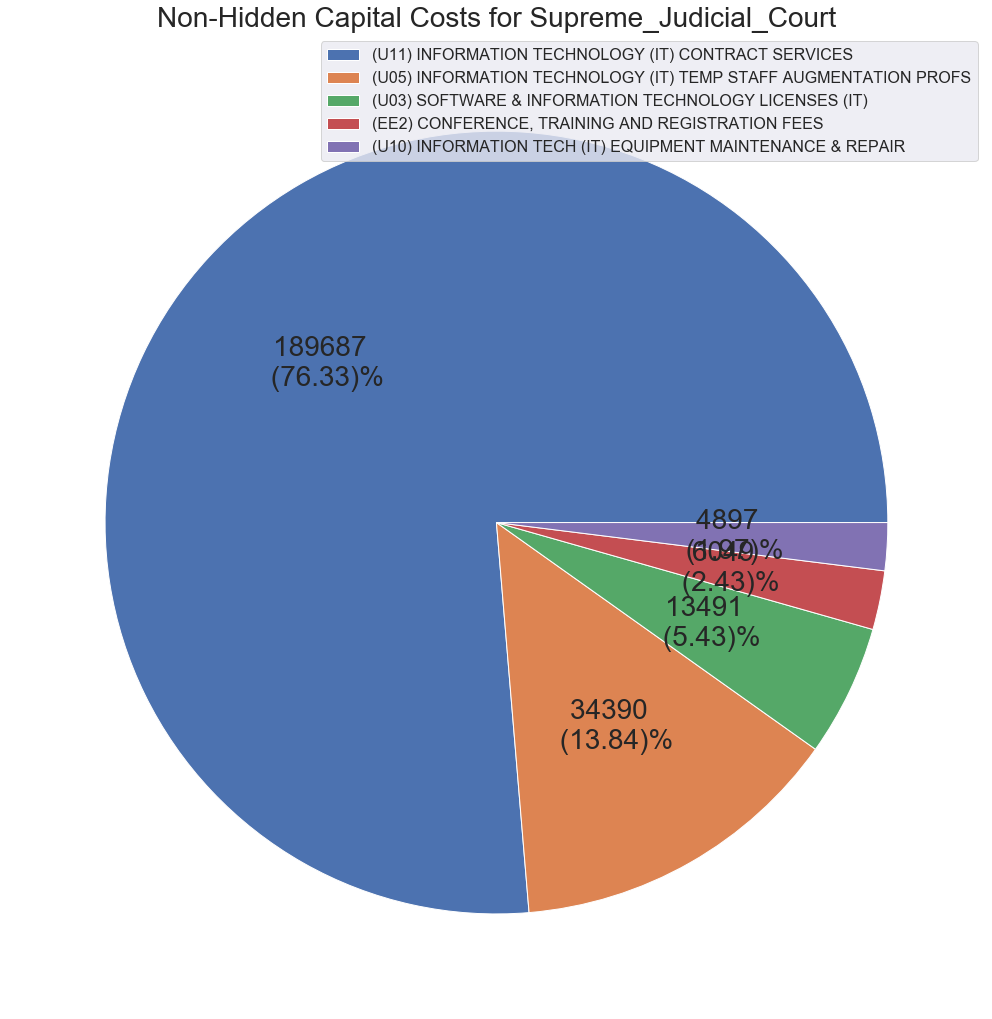

In [50]:
for name, agency in agencies.items():
    if agency.capital_expenditures is not None and not agency.capital_expenditures.empty:
        gb = agency.capital_expenditures.groupby("object_code").sum()["amount"]/4
        gb = gb.sort_values(ascending=False)[:8]
  
        fig1, ax1 = plt.subplots()
        colors = [pal[x] for x in gb.index]
        ax1.pie(gb.values, autopct =lambda p: '{:.0f} \n ({:1.2f})%'.format(p * gb.sum() / 100, p),  textprops={'fontsize': 28})
        ax1.legend(gb.index, prop={'size': 16})
        plt.title("Non-Hidden Capital Costs for {}".format(name), fontsize = 28)
        fig1.savefig("Nov9_Figures/{}_non_hidden_capital_pie.png".format(name))

Next break down fraction of capital costs from DCP vs non-hidden

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


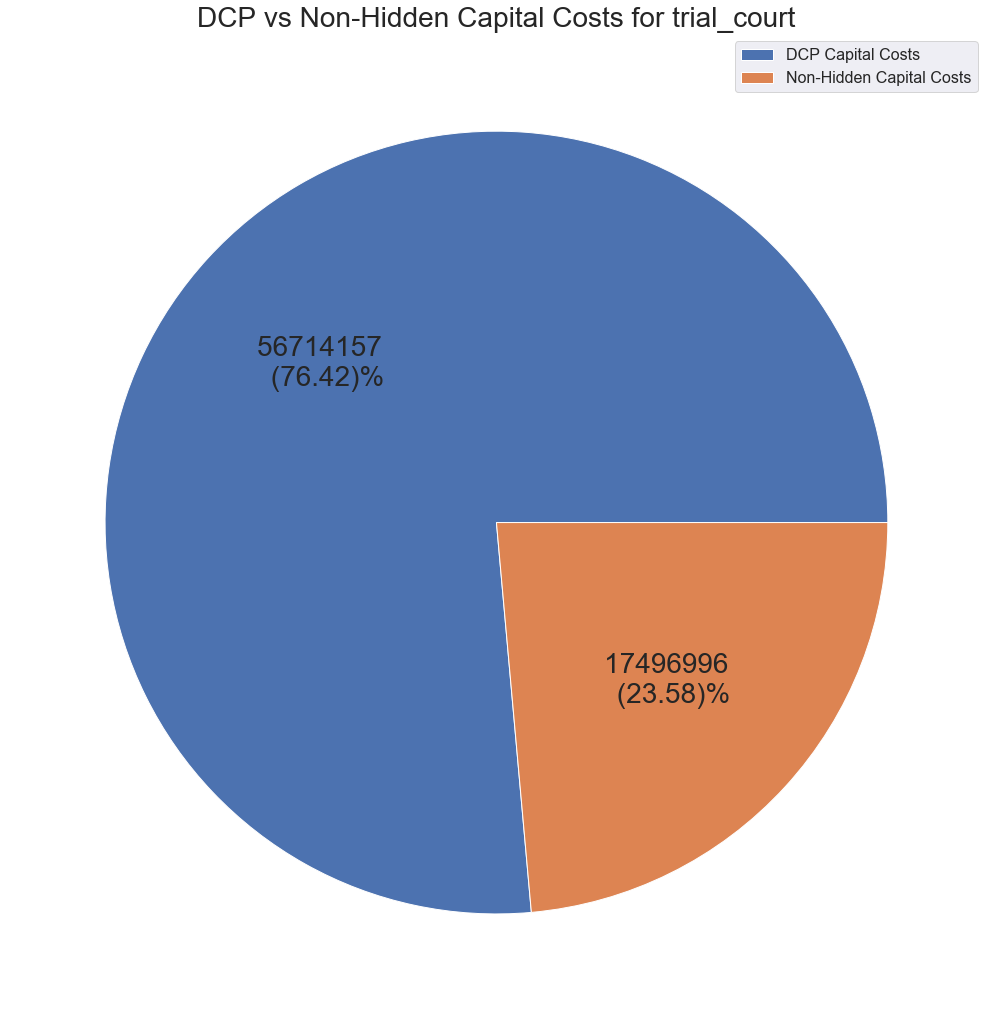

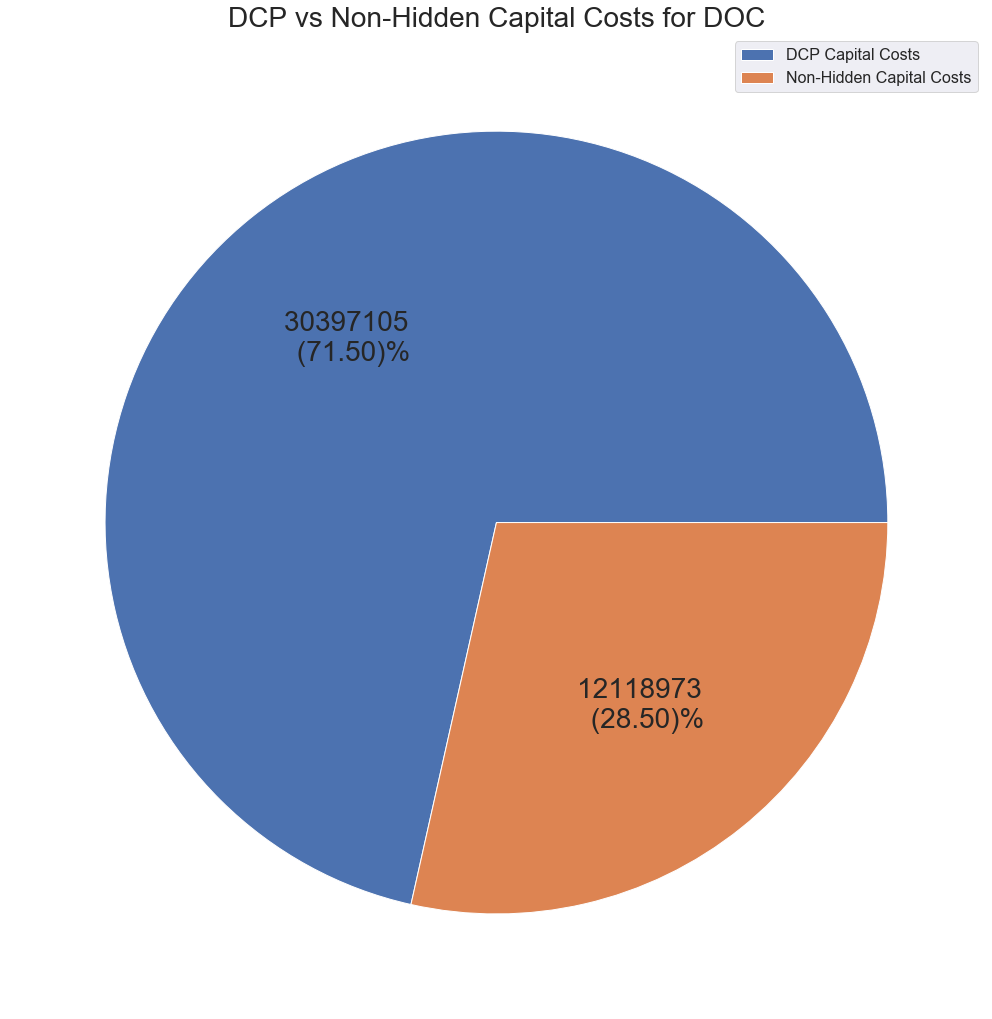

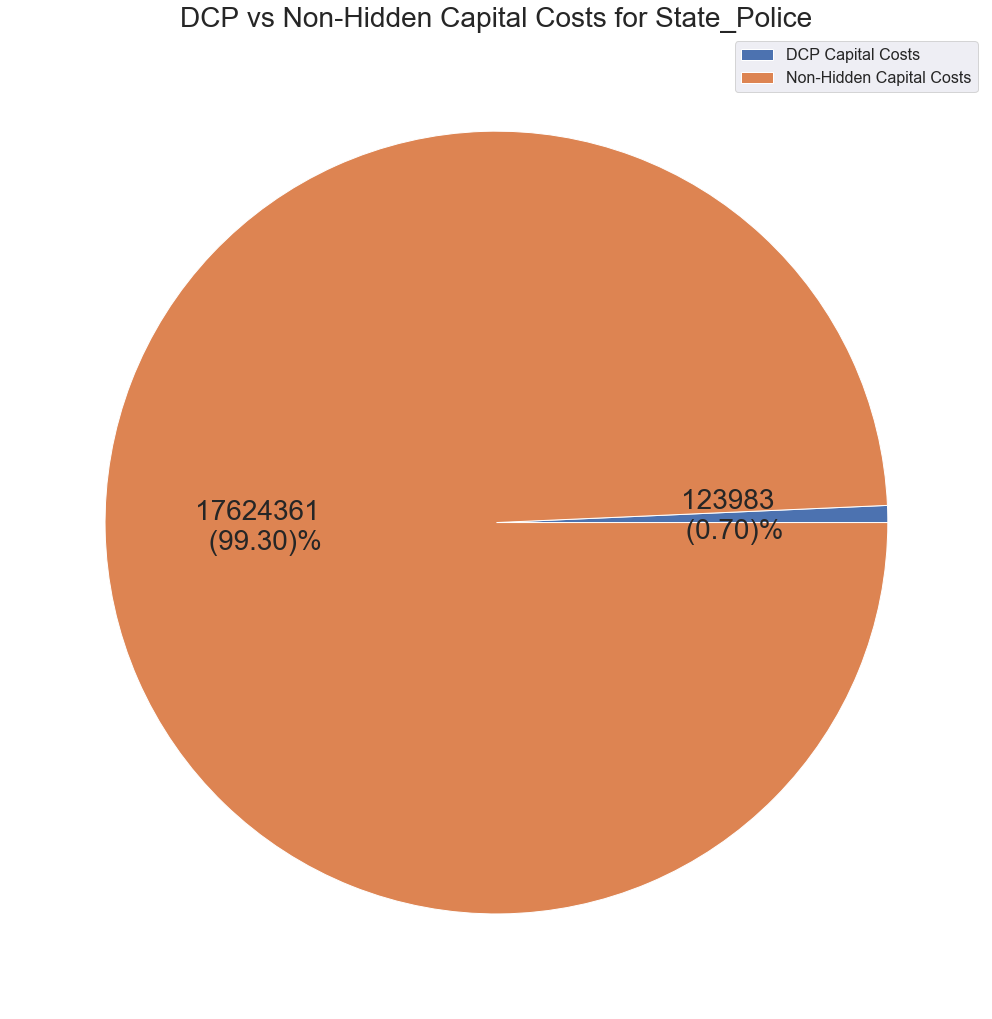

In [56]:
for name, agency in agencies.items():
    if agency.alias in DCP_by_year.index:
        pie_data=pd.Series()
        pie_data.loc["DCP Capital Costs"] = DCP_by_year.loc[agency.alias].sum()/4
        pie_data.loc["Non-Hidden Capital Costs"] = agency.capital_expenditures["amount"].sum()/4
        
        fig1, ax1 = plt.subplots()
        ax1.pie(pie_data.values, autopct =lambda p: '{:.0f} \n ({:1.2f})%'.format(p * pie_data.sum() / 100, p),  
                textprops={'fontsize': 28})
        ax1.legend(pie_data.index, prop={'size': 16})
        plt.title("DCP vs Non-Hidden Capital Costs for {}".format(name), fontsize = 28)
        fig1.savefig("Nov9_Figures/{}_compare_DCP_to_non_Hidden.png".format(name))

In [61]:
agencies["State_Police"].capital_expenditures.head(5)

,Unnamed: 0,base_id,budget_fiscal_year,fiscal_period,date,cabinet_secretariat,department,appropriation_type,appropriation_name,object_class,...,appropriation_code,object,department_code,vendor,vendor_id,payment_id,payment_method,state,city,create_date
240,240,A0000000000973760010,2017,5,2016-12-05T00:00:00.000,EXECUTIVE OFFICE OF PUBLIC SAFETY & HOMELAND S...,DEPARTMENT OF STATE POLICE (POL),(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,...,11022009,N50,POL,STEVEN M LUCCI,L & D CONTRACTING,PVPOL353017335N03000,EFT,UNASSIGNED,UNASSIGNED,2019-08-31T13:32:03.000
288,288,A0000000000973772179,2017,5,2016-12-01T00:00:00.000,EXECUTIVE OFFICE OF PUBLIC SAFETY & HOMELAND S...,DEPARTMENT OF STATE POLICE (POL),(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,...,11022009,N50,POL,DANKRIS BUILDERS CORP,UNASSIGNED,PVPOL353017334N03000,EFT,MA,PLAINVILLE,2019-08-31T13:32:03.000
334,334,A0000000000973780072,2017,5,2016-12-12T00:00:00.000,EXECUTIVE OFFICE OF PUBLIC SAFETY & HOMELAND S...,DEPARTMENT OF STATE POLICE (POL),(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,...,11022009,N52,POL,WW GRAINGER INC,UNASSIGNED,PVPOL353017322N02000,EFT,IL,LAKE FOREST,2019-08-31T13:32:03.000
377,377,A0000000000973788699,2017,4,2016-11-07T00:00:00.000,EXECUTIVE OFFICE OF PUBLIC SAFETY & HOMELAND S...,DEPARTMENT OF STATE POLICE (POL),(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(NN) INFRASTRUCTURE:,...,11022009,N50,POL,MURPHY SPECIALTY INC,UNASSIGNED,PVPOL353017300N04000,EFT,MA,BOSTON,2019-08-31T13:32:03.000
717,717,A0000000000973860915,2018,6,2017-12-07T00:00:00.000,EXECUTIVE OFFICE OF PUBLIC SAFETY & HOMELAND S...,DEPARTMENT OF STATE POLICE (POL),(2CN) CAPITAL,(11022009) COMMONWEALTH FACILITY IMPROVEMENTS,(HH) CONSULTANT SVCS (TO DEPTS),...,11022009,HH2,POL,ARCHITECTURAL ENGINEERS INC,UNASSIGNED,PVPOL353018339ARCH66,EFT,MA,BOSTON,2019-08-31T13:32:03.000
